<a href="https://colab.research.google.com/github/zohreh2016/Bank_Customers-ML-Project/blob/main/Bank_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data Preprocessing


dataset source: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

## Import Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

## Data Exploration

In [145]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [146]:
dataset.shape

(10000, 14)

In [147]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [148]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [149]:
len(dataset.select_dtypes(include='object').columns)

3

3 columns with provided names in[9]existed

In [150]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [151]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [152]:
#statistical summery
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing values

In [153]:
dataset.isnull().values.any()

False

In [154]:
dataset.isnull().values.sum()

0

##Encode Categorical data

In [155]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [156]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [157]:
# we can remove thw first 3 columns because they are not statistically significant with the target which column "Exited"

dataset = dataset.drop(columns=['RowNumber', 'CustomerId',	'Surname'])

In [158]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [159]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [160]:
# let us check unique value in each categorial columns:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [161]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [162]:
# we need to apply one hot encoding on these 2 categorial columns.
# before that let's get soem info

dataset.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


the average credit score in france is 649.668329 and in Germany....... and in Spain.........
and also about other specifics,
the biggest difference is the mean of balance in Germany which is 119730

In [163]:
dataset.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


but here all the averages are almost the same

In [164]:
# Now we encode categorical data
dataset = pd.get_dummies(dataset,drop_first=True)

In [165]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [166]:
# how interesting in above hot coding: based on the column Geography_Germany and 	Geography_Spain
#for France it shows :  0  0
#for Spain it shows  :  0  1
#for Germany it shows : 1  0

##Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


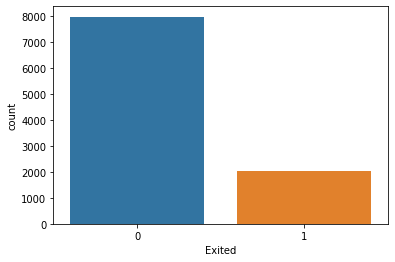

In [167]:
sns.countplot(dataset['Exited'])

In [168]:
# Exited customers
(dataset.Exited == 1).sum()

2037

In [169]:
# Not exited customers
(dataset.Exited == 0).sum()

7963

7963 customers stay with bank. and 2037 left the bank

## Correlation Matrix and Heatmap

In [170]:
# we need to separate target variable
dataset_2 = dataset.drop(columns='Exited')

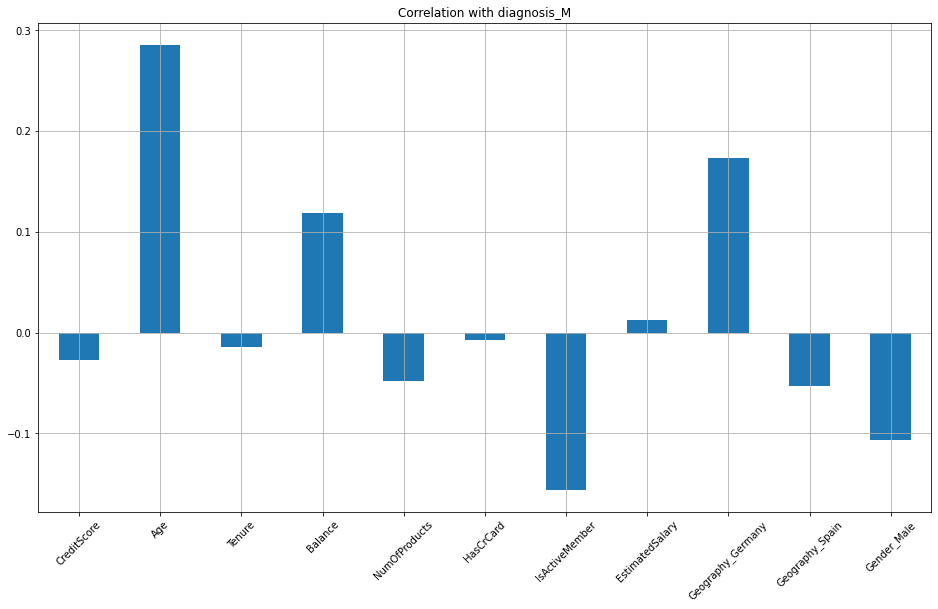

In [171]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9), title = 'Correlation with diagnosis_M', 
    rot = 45, grid = True
)

In [172]:
# define a variable for correlation
corr = dataset.corr()


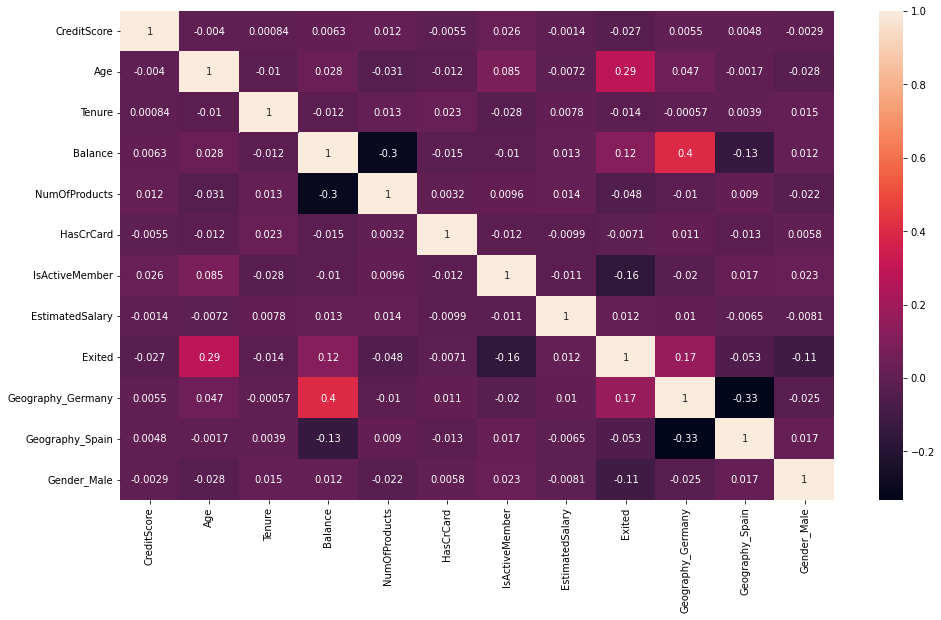

In [173]:
# draw heatmap
# Check the correlation between variables 

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)


## Split dataset

In [174]:
# first we need to specify x and y

x = dataset.drop(columns='Exited')

In [175]:
y = dataset['Exited']

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [177]:
 y_test.shape

(2000,)

In [178]:
y_train.shape

(8000,)

## Feature Scaling

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#apply feature scaling
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [180]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [181]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

so you can see the range is [-3,3] meaning we successfully applied feature scaling

# 2- Building Model with 3 different models

## 1- Logistic Regression

In [182]:
# improt the class of LogisticRegression
from sklearn.linear_model import LogisticRegression
# create an instance of the class
classifier_lr = LogisticRegression(random_state=0)
#fit the model by triang our model
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [183]:
# make prediction
y_pred = classifier_lr.predict(x_test)

In [184]:
# analyse performance of our model
#first we need to import them

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [185]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [186]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842


### Cross validation and confusion matrix

In [187]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


In [188]:
# we have used 10 different cross validation (cv=10) meaning 10 dataset from xtrain and y train which randomly selected.

In [190]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


## 2- Random Forest


In [191]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [192]:
y_pred = classifier_rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842
1,Random Forest,0.867,0.745583,0.520988,0.613372


### Cross validation and confusion matrix

In [193]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


In [195]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


## 3- XGBoost

In [197]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier()

In [198]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGBoost,0.8645,0.737589,0.513580,0.605531


### Cross validation and confusion matrix

In [199]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.25 %
Standard Deviation is 1.02 %


In [200]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1521   74]
 [ 197  208]]


# 4- Randomized Search to find the best parameters (XGBoost)

In [ ]:
#accuracy in XGBOOST is better

# what is XGBOOST: 
#it is an implementation of gradient boosted decision trees designed for "speed" and "performance".


Parameters in XGboost: https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [201]:
# so important: hyper parameters are those which are not trained while we are modeling.
# in link below, in API, you neeed to look for "model selection" and then " hyper parameters optimizers" then "RandomizedSearchCV"
# keep in mind there is 2 methos RandomizedSearchCV and GridSearchCV, but we are using the first, 
#because the second one tries to remove all parameters out and it takes time.

In [202]:
from sklearn.model_selection import RandomizedSearchCV


In [203]:
parameters ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
    }

In [204]:
randomized_search = RandomizedSearchCV(estimator = classifier_xgb, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

# cv: cross-validation
# n_jobs = -1:
# Number of jobs to run in parallel. -1 means using all processors

In [205]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [206]:
randomized_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=5,
              min_child_weight=3)

In [207]:
randomized_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 3}

In [208]:
randomized_search.best_score_

0.8631340212578685

# 5- Final Model (XGBoost)

In [209]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
classifier.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.1, max_depth=5, min_child_weight=7)

In [211]:
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGBoost,0.8645,0.737589,0.513580,0.605531
3,Final XGBoost,0.8655,0.737762,0.520988,0.610709


### Cross validation and confusion matrix

In [212]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.44 %
Standard Deviation is 0.99 %


In [213]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1520   75]
 [ 194  211]]


# 6- Predicting a single observation

In [214]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [215]:
dataset.shape

(10000, 12)

In [216]:
x_test.shape

(2000, 11)

In [217]:
single_obs = [[619,	42,	2,	0.00,	1,	1,	1,	101348.88, 0,	0, 0]]

In [218]:
print(classifier.predict(sc.transform(single_obs)))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
